In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [ ]:
df = pd.read_csv('/content/social_media_engagement1.csv')
print(df.head())

   post_id   platform post_type        post_time  likes  comments  shares  \
0        1   Facebook     image  8/17/2023 14:45   2121       474     628   
1        2   Facebook  carousel   5/14/2023 0:45   3660       432     694   
2        3  Instagram      poll  2/21/2023 16:15   4955       408     688   
3        4    Twitter     image  11/16/2023 0:45   1183        90     187   
4        5    Twitter     video   5/23/2023 0:30   3499       247     286   

   post_day sentiment_score  
0  Thursday        positive  
1    Sunday         neutral  
2   Tuesday        negative  
3  Thursday        negative  
4   Tuesday        positive  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB
None


In [ ]:
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)

Missing values:
 post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64


In [ ]:
df['post_time'] = pd.to_datetime(df['post_time'])
df['post_hour'] = df['post_time'].dt.hour
df['post_month'] = df['post_time'].dt.month
df['post_weekday'] = df['post_time'].dt.day_name()
df['engagement'] = df['likes'] + df['comments'] + df['shares']

In [ ]:
label_cols = ['platform', 'post_type', 'post_day', 'sentiment_score']
for col in label_cols:
    df[col + '_num'] = LabelEncoder().fit_transform(df[col])


In [ ]:
scaler = MinMaxScaler()
df[['likes_scaled', 'comments_scaled', 'shares_scaled']] = scaler.fit_transform(
    df[['likes', 'comments', 'shares']]
)

In [ ]:
Q1 = df['engagement'].quantile(0.25)
Q3 = df['engagement'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_filtered = df[(df['engagement'] >= lower_bound) & (df['engagement'] <= upper_bound)]

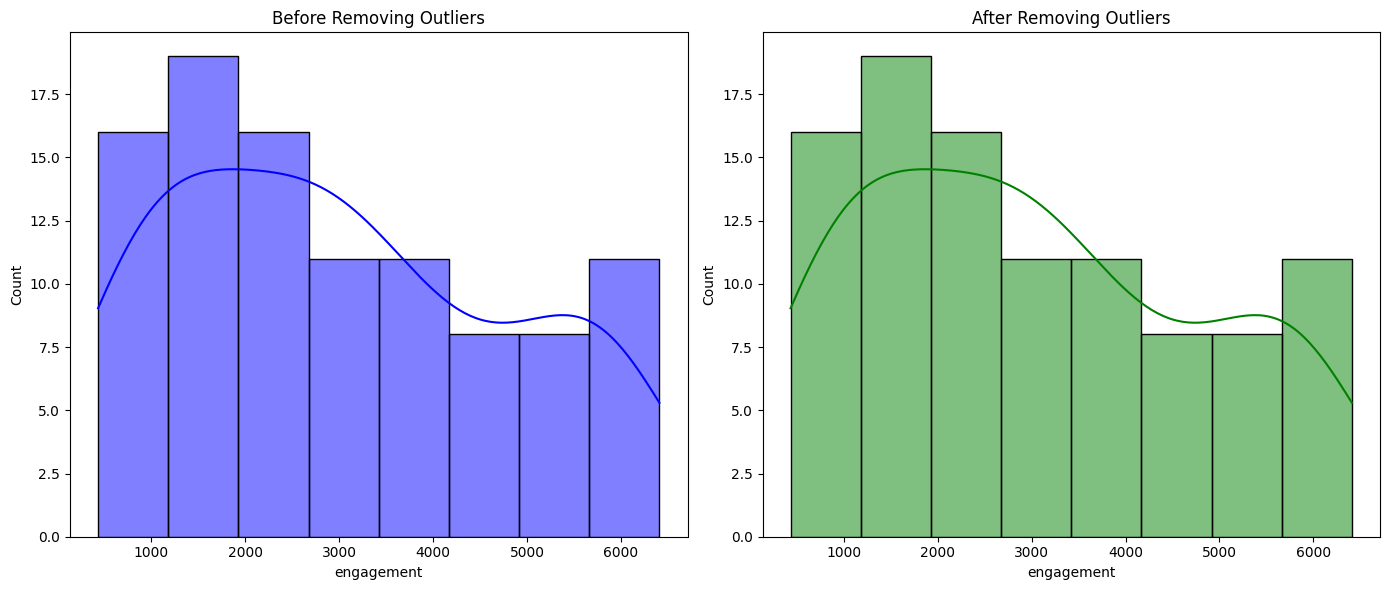

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['engagement'], kde=True, color='blue')
plt.title('Before Removing Outliers')

plt.subplot(1, 2, 2)
sns.histplot(df_iqr_filtered['engagement'], kde=True, color='green')
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()

After removing outliers using the IQR method, we observe that the engagement distribution remains nearly unchanged. This suggests that the original dataset did not have many extreme values, or that those values had minimal impact on the overall distribution.

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

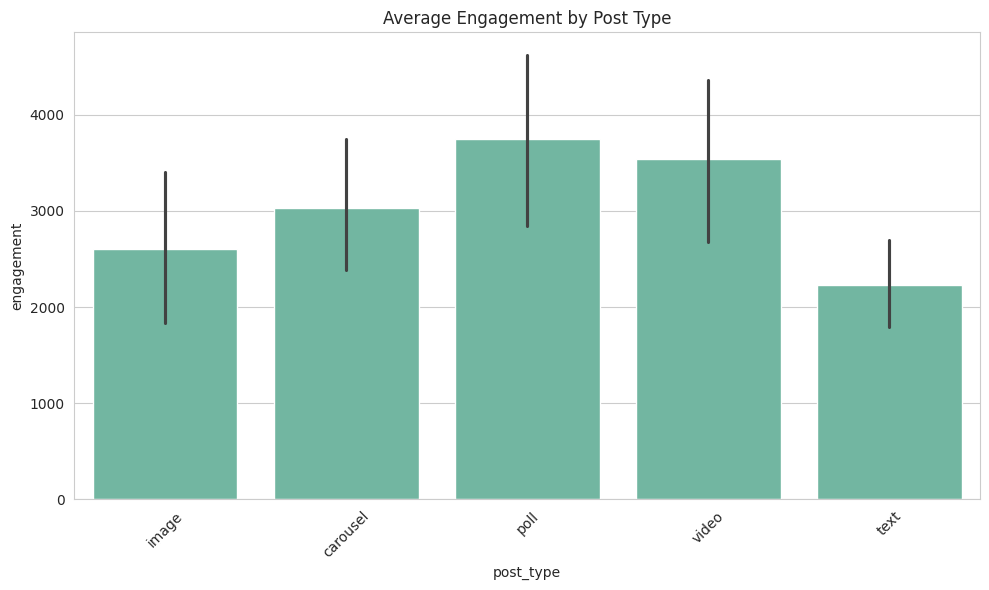

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='post_type', y='engagement', estimator=np.mean)
plt.title("Average Engagement by Post Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart indicates that post type such as  Poll  achieves the highest average engagement compared to others, suggesting it's the most effective in capturing audience interest.



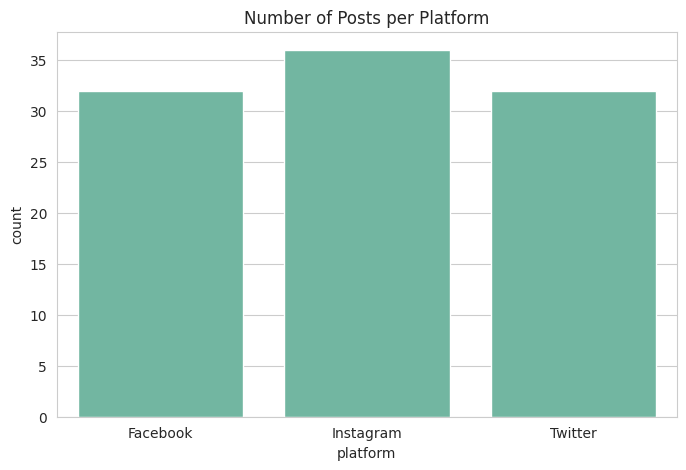

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='platform')
plt.title("Number of Posts per Platform")
plt.show()

"The chart shows that the most frequently used platform for posting is [Instagram], which may reflect a preference by the brand or users. This insight can help guide future content strategies."



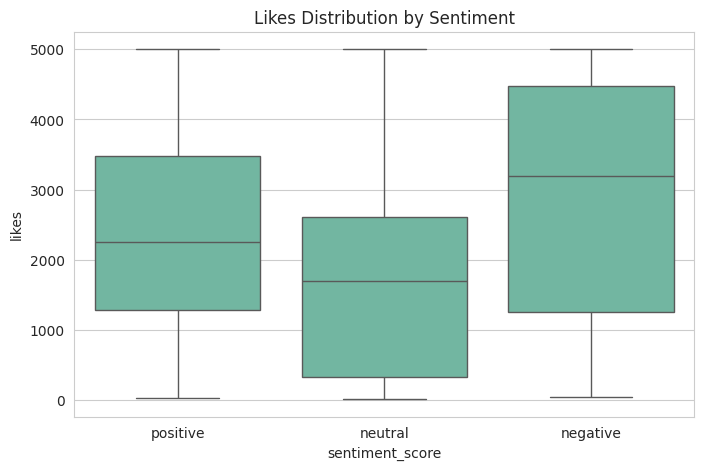

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sentiment_score', y='likes')
plt.title("Likes Distribution by Sentiment")
plt.show()

The boxplot reveals that posts with negative sentiment tend to receive more likes than those with neutral or positive sentiment. This suggests that negative content may provoke stronger audience reactions or resonate more due to its emotional or controversial nature.



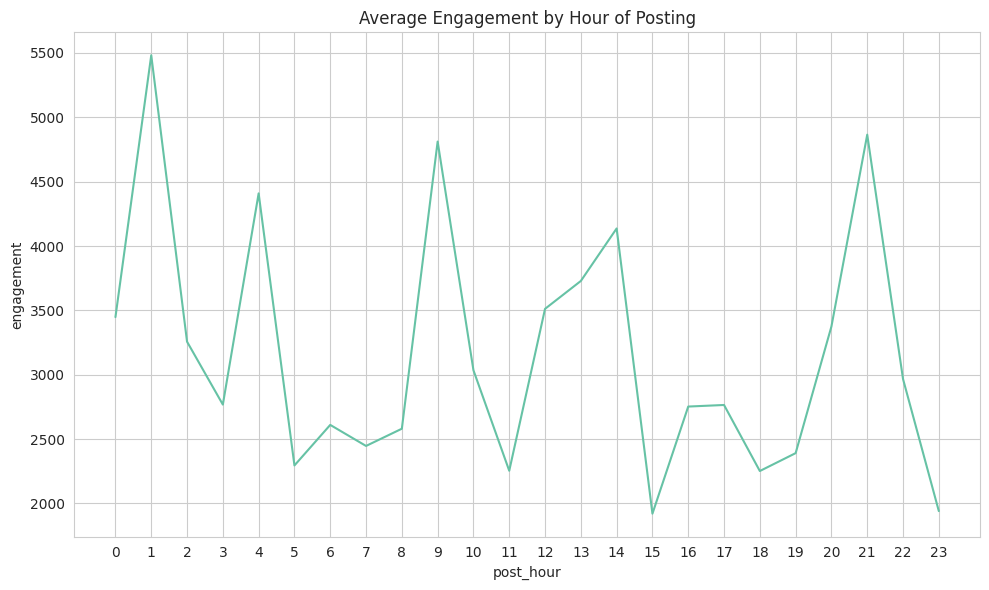

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby('post_hour')['engagement'].mean().reset_index(), x='post_hour', y='engagement')
plt.title("Average Engagement by Hour of Posting")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

the chart shows that engagement peaks around 1 AM, followed by 9 PM, 4 PM, and 1–2 PM. This indicates that users are more active and responsive during these hours, making them ideal times for posting content to maximize interaction.



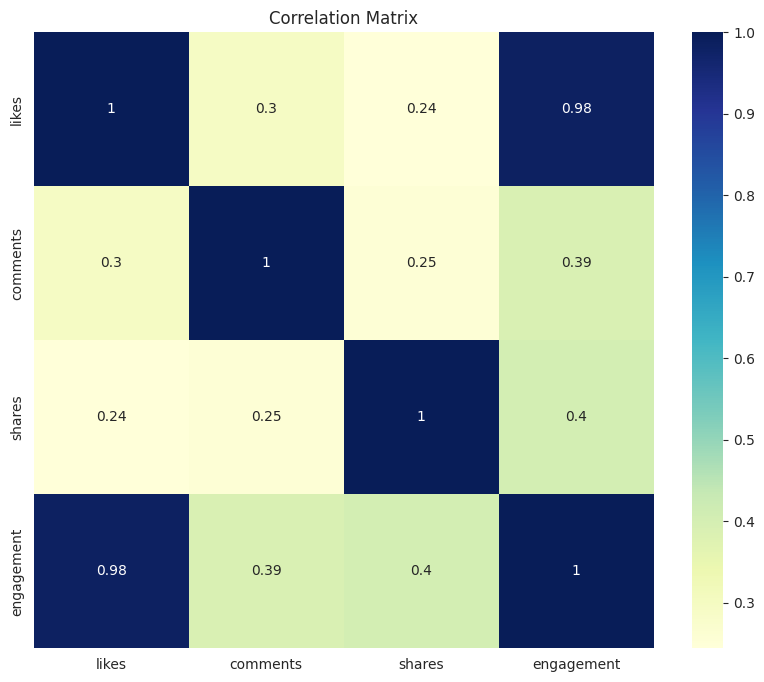

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['likes', 'comments', 'shares', 'engagement']].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows that likes have the strongest impact on overall engagement with a coefficient of 0.98, indicating a nearly perfect positive relationship. Shares and comments follow with moderate correlations around 0.40. The weak correlations between likes, comments, and shares suggest that users interact in different ways independently.



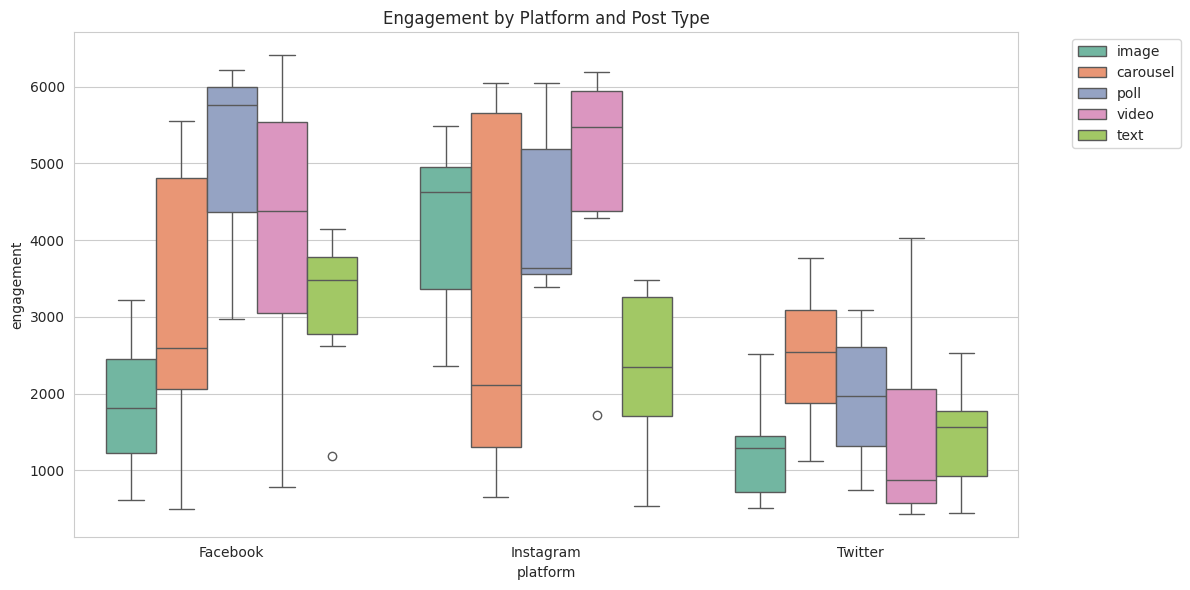

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='platform', y='engagement', hue='post_type')
plt.title("Engagement by Platform and Post Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The boxplot shows how engagement varies across platforms and post types. By observing the distribution of engagement per post type on each platform, it's clear that some content types perform better on specific platforms. This insight highlights the importance of tailoring content strategy to each platform to maximize engagement.



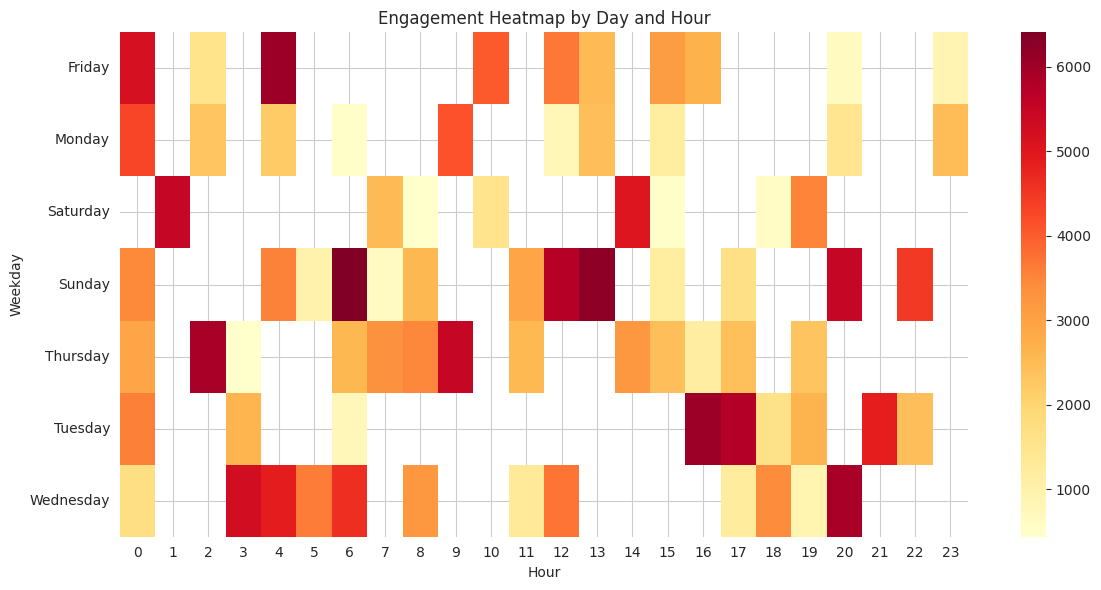

In [ ]:
heatmap_data = df.groupby(['post_weekday', 'post_hour'])['engagement'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd")
plt.title("Engagement Heatmap by Day and Hour")
plt.xlabel("Hour")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

If you post once or twice a week, the strongest slots are Sunday at 12 PM and Wednesday at 8 PM.

If you post more often, add Thursday at 5 PM and Friday at 11 AM for extra reach.



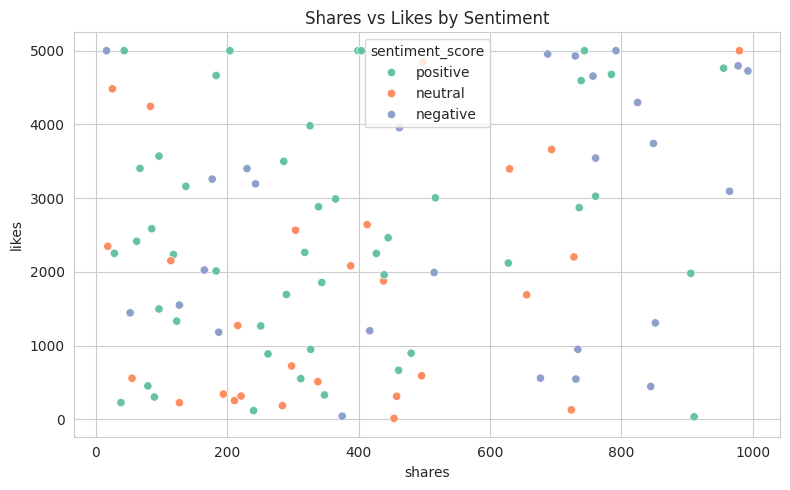

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='shares', y='likes', hue='sentiment_score')
plt.title("Shares vs Likes by Sentiment")
plt.tight_layout()
plt.show()

The analysis shows that positive posts achieve the highest engagement in both likes and shares, while negative content sometimes gets high shares but fewer likes, and neutral content generates moderate engagement.



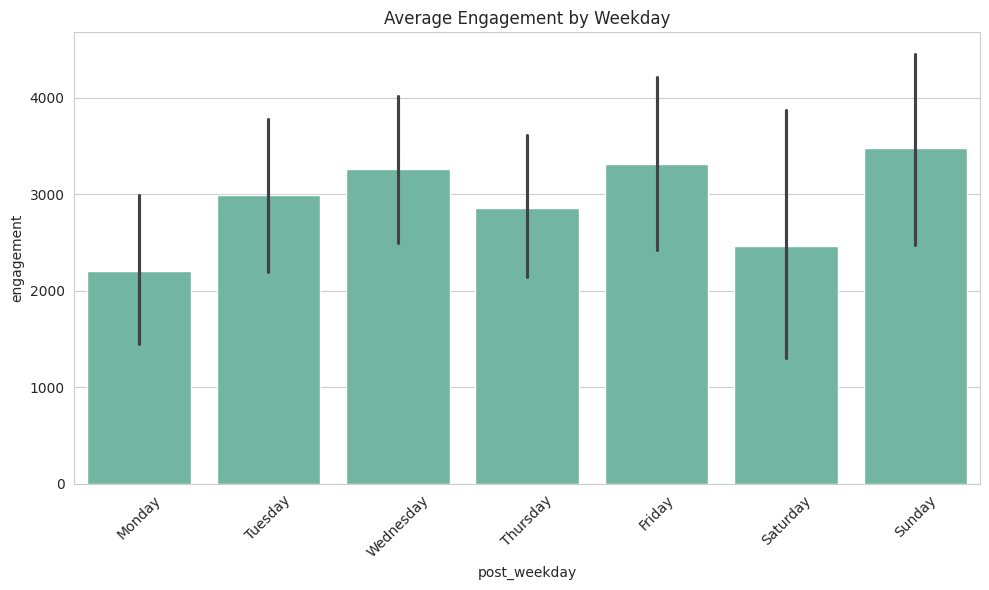

In [ ]:
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df, x='post_weekday', y='engagement', order=order)
plt.title("Average Engagement by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the barplot, we can observe the following:

 Sunday shows the highest average engagement among all days, making it the best day to post for maximizing audience interaction.

 Wednesday and Thursday also have relatively high engagement, suggesting they are great days for posting.

 Tuesday and Friday have moderate engagement levels — acceptable, but not the most optimal.

 Saturday and Monday show the lowest average engagement, so it's recommended to avoid or minimize posting on those days.

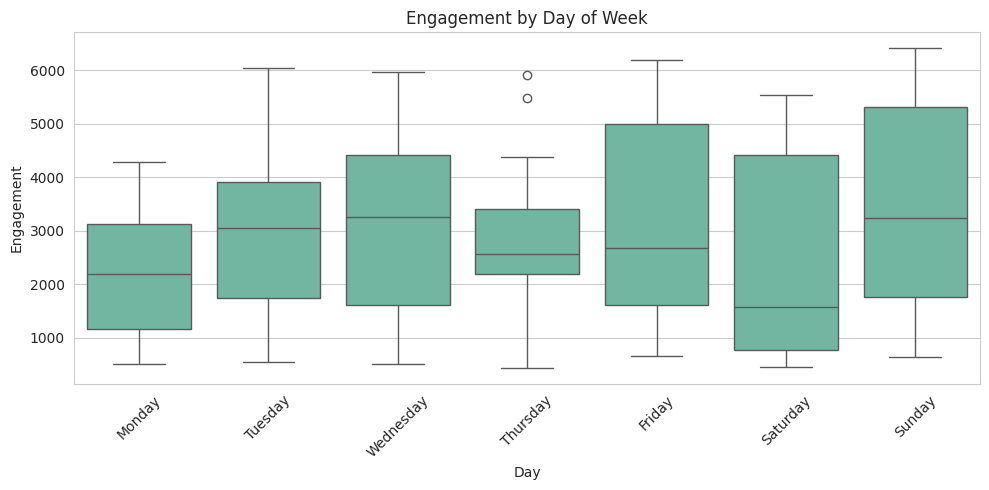

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='post_weekday', y='engagement', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Engagement by Day of Week')
plt.xlabel('Day')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The median engagement is highest on Sunday, confirming it as a strong day for posting.

Wednesday and Thursday also show high median engagement and wider interquartile ranges, meaning posts often perform well but with some variation.

Saturday shows low and consistent engagement, making it the weakest day to post.

Monday has both a low median and narrow range, indicating consistently low performance.

The presence of outliers on most days suggests that high engagement can still occur unexpectedly, especially on Sunday and Thursday.



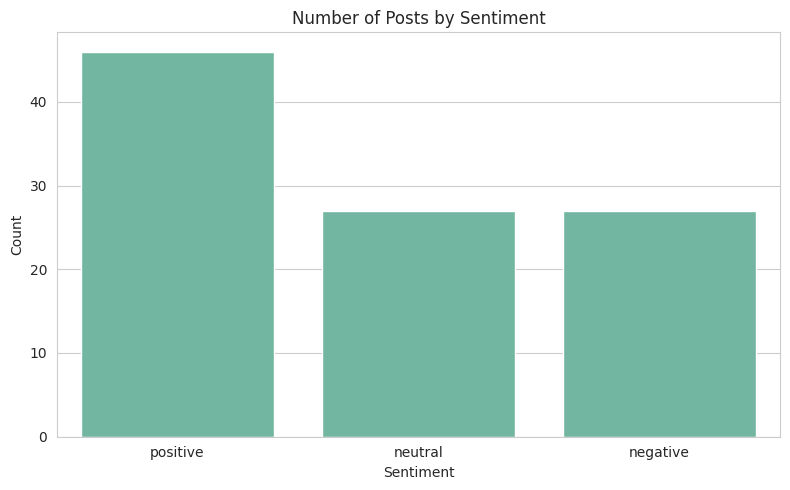

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_score', order=df['sentiment_score'].value_counts().index)
plt.title('Number of Posts by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Positive content dominates in terms of post count, but that does not necessarily mean it receives higher engagement. Previous charts suggest that negative posts, although fewer, tend to generate stronger reactions.




- Conclusion :
In conclusion, our analysis shows that post engagement is influenced by several factors, including timing, content type, and sentiment. Posting early in the morning or around noon on weekdays like Sunday and Thursday tends to yield higher engagement. Although negative content is less frequent, it often generates stronger reactions. By aligning content strategy with these insights, we can significantly improve audience interaction.
Our data also revealed that engagement levels vary across platforms. For example, platforms like Instagram showed higher average engagement compared to others like Twitter or Facebook . This suggests that visual or social-driven platforms tend to foster more interaction, especially when paired with engaging content and optimal timing.


